## Boston Housing Dataset

### About the Dataset
The Boston Housing Dataset contains information collected by the US Census Service in 1970 on various house prices in the area of Boston. The dataset is small in size with only 506 samples and 14 variables. The data gives values for various features of different suburbs of Boston as well as the median-value for homes in each suburb. The features were chosen to reflect various aspects believed to influence houses prices including the structure of the house (age and spaciousness), the quality of the neighborhood, transportation access to employment centers and highways, and pollution.

This dataset is widely used for machine learning.

### Objective
The goals of this assessment are as follows:

 - Analyse the dataset using descriptive statistics and plots.
 - Determine if linear relationships exist between the dependent variable Y and one or more independent variables.
 - Perform linear regression on the linear relationships.
 - Use regression to predict the value of the dependent variable Y from that of the independent variables.


### Python Libraries
Python has a large number of libraries which makes it a powerful programming language for analysing data. The libraries that were imported and used in this project were NumPy, Pandas, Matplotlib, Seaborn, Sklearn, Scipy and Keras.

 - NumPy - an array processing package.
 - Pandas - a data processing library which provides tools for shaping, merging, reshaping, and slicing data sets.
 - Matplotlib - a graphing library to create 2D plots and graphs on a variety of data formats.
 - Seaborn library - a plotting and styling library.
 - Scikit-learn is a library that provides many unsupervised and supervised learning algorithms.
 - SciPy is a library that uses NumPy for more mathematical functions.

In [57]:
# for generating random variables
import numpy as np

# for plotting
import matplotlib.pyplot as plt 

# for managing data
import pandas as pd

# for plotting
import seaborn as sns 

# for t-tests and ANOVA
import scipy.stats as stats

# for learning algorithms
import sklearn

# for encoding categorical variables
import sklearn.preprocessing as pre

# for splitting into training and test sets
import sklearn.model_selection as mod

%matplotlib inline

# to increase the size of the plots as plots are too small otherwise
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Load the dataset
The Boston Housing dataset can be accessed through the scikit-learn library. The dataset can be directly imported from the scikit-learn library rather than downloading the csv file from an external website. The Boston dataset consists of 506 rows and 14 columns. It is a relatively small, clean and well-known dataset used for machine learning projects.

In [58]:
# load the dataset from the scikit-learn library

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [59]:
# print the shape of the dataset and a description of the variables. This shows 506 samples, 14 variables and no missing values.

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Create a Panda's Dataframe
The data from the Boston dataset is transferred to a Panda's dataframe to carry out descriptive statistics on the dataset. A Panda's dataframe is a table structure with labelled rows and columns.

In [60]:
# load data into dataframe and print the first 5 rows of data
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Print first 5 rows
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
# Median value is a missing variable - the target variable - this needs to be added to the dataframe 
boston['MEDV'] = boston_dataset.target

# Print first 5 rows
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
# check for any missing values in the dataset - a clean dataset is required for analysis
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values in the boston dataset.

In [63]:
# check the type of data of all the variables
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

All the variables are data type float.

In [64]:
# rename the variables to the full variable name to avoid confusion
boston.columns = ['crime_rate', 'large_zones', 'industrial', 'charles_river', 'nitric_oxide', 'rooms', 'old_houses', 'distance', 'highway_access', 'property_tax', 'pupil_teacher_ratio', 'proportion_blacks', 'lower_status', 'median_value']

# print first 5 rows
boston.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Descriptive Statistics
Now that the dataset has been loaded into a Panda's dataframe and the missing variable MEDV has been added, the dataset needs to be analysed to learn more about what it contains. 

The Panda's describe function produces the descriptive statistics on the dataset. The mean, standard deviation, maximum number, minimum number, 25% quartile range (median), 50% quartile range and 75% quartile range are calculated for all 14 variables.

In [65]:
# descriptive statistics are obtained using the describe function. Adding the .T swaps the rows and columns.
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
large_zones,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
industrial,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
charles_river,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitric_oxide,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
old_houses,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
highway_access,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
property_tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


It is difficult to obtain a clear picture of the dataset using the basic raw descriptive statistics - it is not very informative in this state. Visualisation tools such as graphs provide an accessible way to see and understand trends, outliers, and patterns in data.

### Visualisations
The raw descriptive statistics gave all the relevant information on each of the variables in the dataset, however using visual tools such as histograms, boxplots and scatterplots will make it easier to visualise the distribution of each of the 14 variables.

Using the Seaborn library the distribution of the dependent variable 'median_value' will be visualised using the histogram and boxplot functions. This dependent variable is the median-value of houses within a given suburb in $1'000's. 

The pairplot function in seaborn will then be used to visualise the distribution of the data for the other independent variables. This will determine which independent variables have a linear relationship with the dependent variable - the initial judgment of possible relationships between two continuous variables is often made on the basis of a scatter plot.

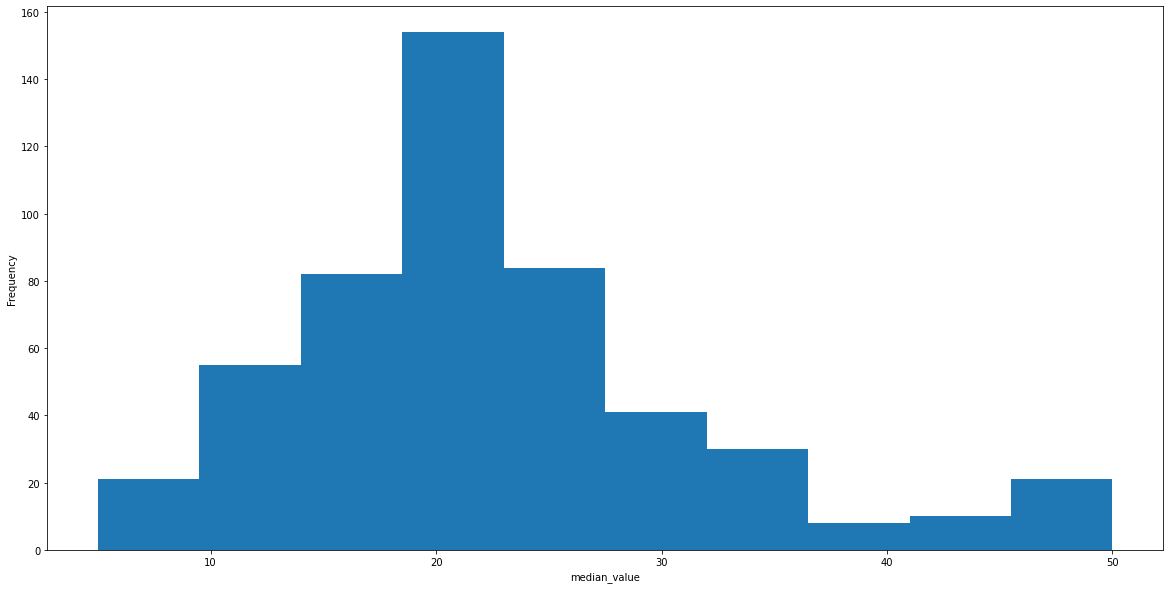

In [66]:
# create a histogram on the 'median_value'
plt.hist(boston['median_value'])

# set the name of the x-axis
plt.xlabel("median_value")

# set the name of the y-axis
plt.ylabel("Frequency")

# plot the histogram
plt.show()

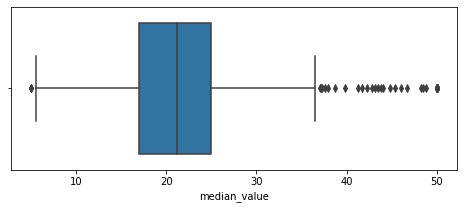

In [67]:
# create a boxplot on variable 'median_value'
plt.figure(figsize=(8,3))
sns.boxplot(boston['median_value'])

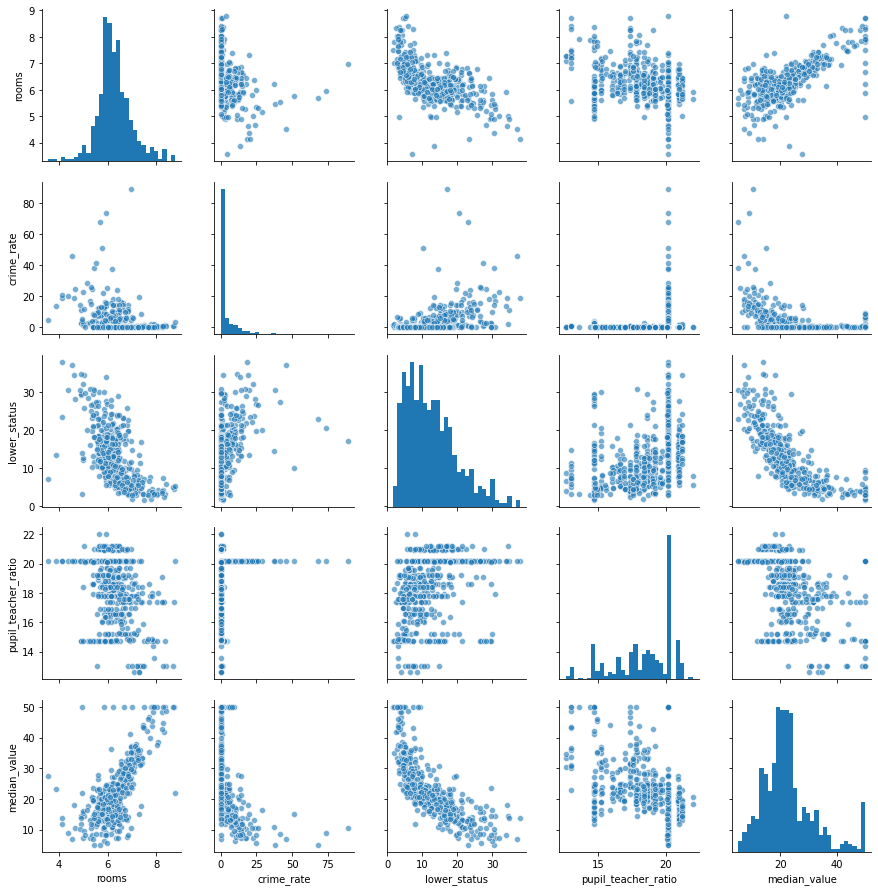

In [68]:
# create a list called cols with 5 of the variables
cols = ['rooms', 'crime_rate', 'lower_status', 'pupil_teacher_ratio', 'median_value']

# create pairplots on the list of variables in cols
sns.pairplot(boston[cols],
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30})

# plot the pairplots
plt.show()

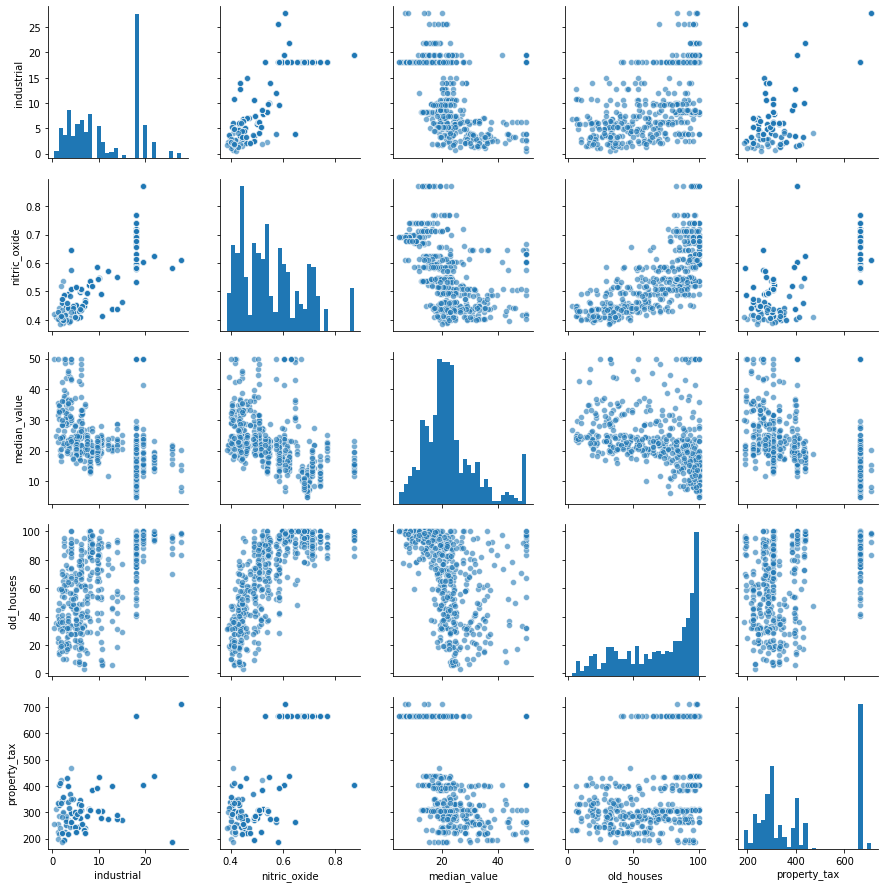

In [69]:
# create a second list called cols_1 with 5 of the variables
cols_1 = ['industrial', 'nitric_oxide', 'median_value', 'old_houses', 'property_tax']

# create pairplots on the list of variables in cols
sns.pairplot(boston[cols_1],
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30})

# plot the pairplots
plt.show()

### Overview of Visualisation
It can seen from the histogram that the median_value's distribution is slightly skewed right with several outliers. This shows it is not normally distributed around the mean, but distributed slightly below the mean. The values are centred around 22,000, the minimum value is 5,000 and the maximum value is 50,000. 

The boxplot shows a symmetric distribution with one outlier to the left and several to the right. The range of the distribution is 45,000.

The scatter plots, which are plotting an independent variable with the dependent variable, 'median_value' show that lower_status and rooms have a linear relationship with median_value. The histograms show that the independent variables do not follow a normal distribution.

### Correlation
Correlation measures the statistical relationship between two continuous independent variables. It gives information about the magnitude of the correlation as well as the direction of the relationship. 

Three widely used correlation statistics are the Pearson correlation, Kendall rank correlation and Spearman correlation. For this project the Spearman correlation will be used to measure the relationship between variables as the variables are not normally distributed and there are some outliers.

The output of the correlation function will fall within the range - 1 to + 1 and can be analysed as follows:
- Perfect correlation exists if the value is near to ± 1: as one variable increases, the other variable tends to increase (if positive) or decrease (if negative).
- A strong correlation exists if the coefficient value lies between ± 0.50 and ± 1.
- A medium correlation exists if the value lies between ± 0.30 and ± 0.49.
- A small correlation exists if the value lies below + 0.29.
- No correlation exists when the value is zero.
 
The .corr() function will be used to identify variables where a strong correlation exists (greater than 0.6), between the dependent variable X and independent variables Y.

In [70]:
# run the Panda's corr function on the boston dataframe - method Spearman
boston.corr(method='spearman')

# assign a variable cor
cor = boston.corr(method='spearman')

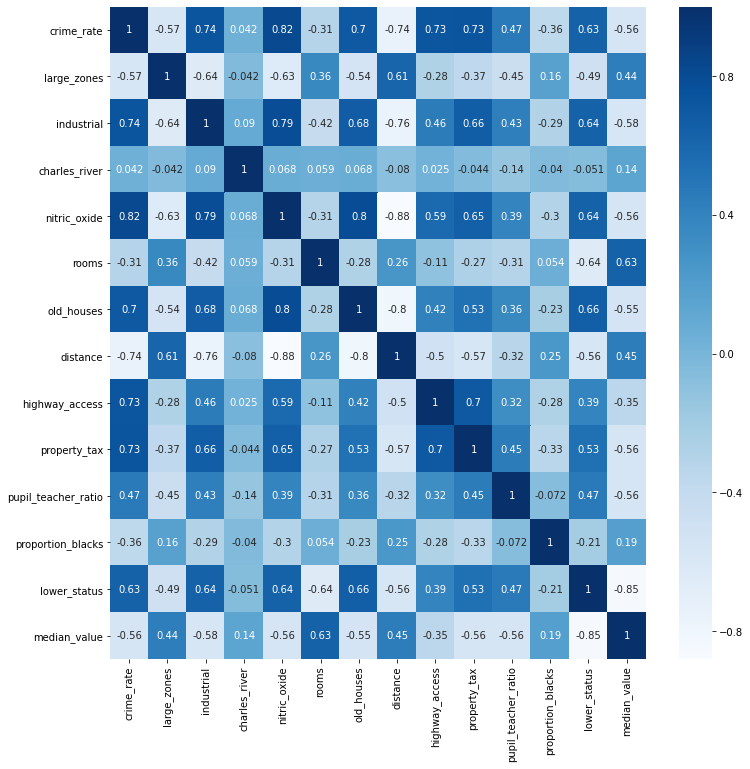

In [71]:
# set the size of the plot
plt.figure(figsize=(12,12))

# assign a variable cor
cor = boston.corr(method='spearman')

# create a heatmap in seaborn of the coefficients
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

In [72]:
# Correlation with target variable
cor_target = abs(cor["median_value"])

# Selecting features with a strong correlation greater than 0.6
relevant_features = cor_target[cor_target>0.6]

# print the relevant_features
relevant_features

rooms           0.633576
lower_status    0.852914
median_value    1.000000
Name: median_value, dtype: float64

Running the .corr() function further demonstrates that rooms and lower_status are two independent variables that have a strong relationship with the dependent variable 'median_value'. The linear relationships are shown more clearly on larger scatter plots below.

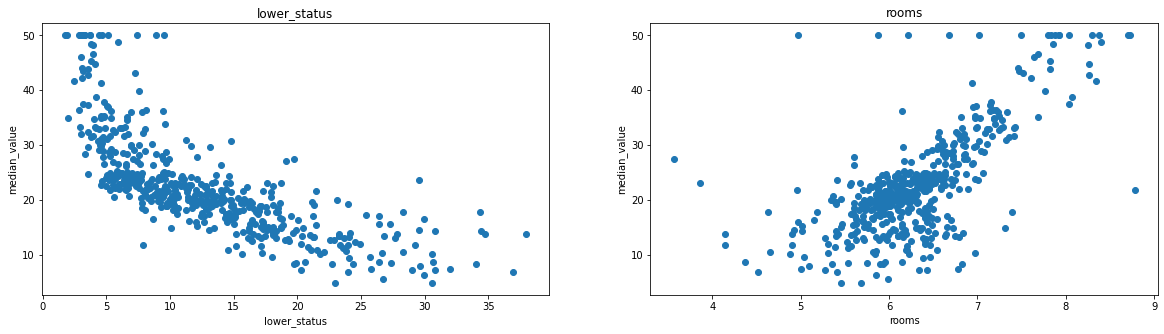

In [73]:
# set plot size
plt.figure(figsize=(20, 5))

# assign variables 
features = ['lower_status', 'rooms']
target = boston['median_value']

# plot each feature with target variable
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('median_value')

### Seaborn
Seaborn is a data visualisation library based on Matplotlib. The Seaborn lmplot() function can be used to visualise linear relationships between variables. The function draws a scatterplot of two variables, X and Y, plots a regression line and a 95% confidence interval for that regression represented by the shaded area around the line.

[-0.85, 0.0]
[0.63, 0.0]


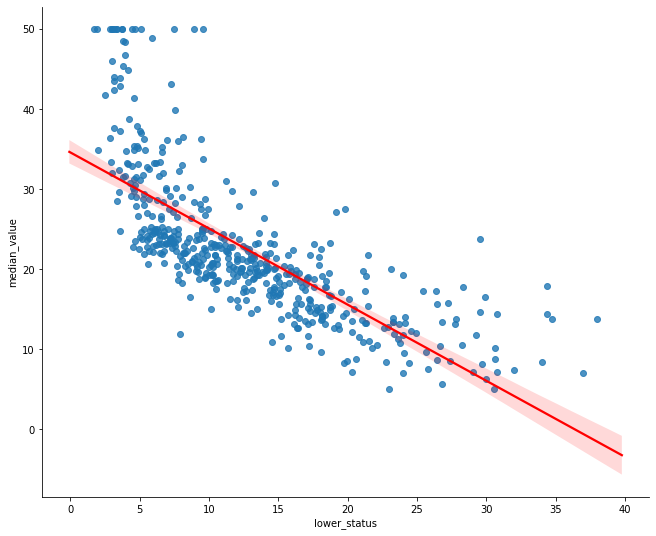

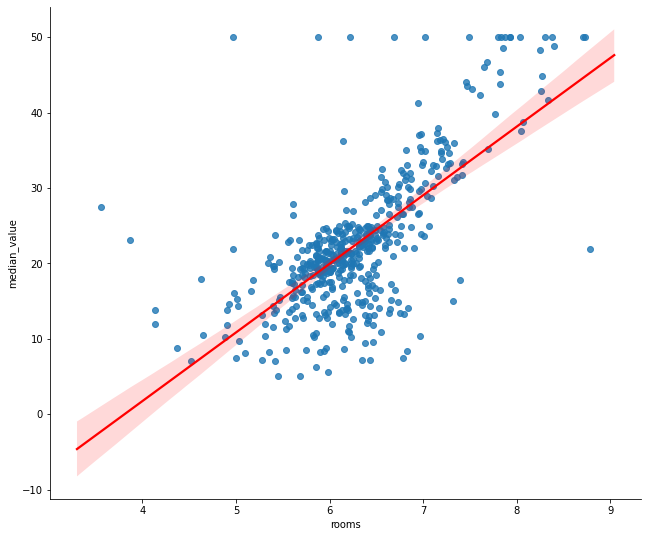

In [74]:
from scipy.stats import spearmanr

# print the spearman coefficient for the relationship between lower_status and median_value
corr = spearmanr(boston['lower_status'], boston['median_value'])
corr = [np.round(c, 2) for c in corr]
print(corr)

# plot scatter plot and regression line for lower_status and median_value
g = sns.lmplot(x="lower_status", y="median_value", data=boston, line_kws={'color': 'red'});

# increase the size of the plot
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

# print the spearman coefficient for the relationship between rooms and median_value
corr1 = spearmanr(boston['rooms'], boston['median_value'])
corr1 = [np.round(c, 2) for c in corr1]
print(corr1)

# plot scatter plot and regression line for rooms and median_value
f = sns.lmplot(x="rooms", y="median_value", data=boston, line_kws={'color': 'red'});

# increase the size of the plot
f.fig.set_figwidth(10)
f.fig.set_figheight(8)

### Overview of Correlation
Rooms and lower_status are highly correlated to the target variable 'median_value' with values over 0.6.

The correlation matrix and corresponding heat map shows that rooms (average number of rooms per dwelling) has a strong positive correlation with the median_value (0.63), whereas lower_status (% lower status of the population) has a high negative correlation with median_value (-0.85). This seems feasible as dwellings with more rooms are likely to be higher in value and areas where there is a lower status are likely to be lower in value. 

The scatter plots visually show the relationships with the target variable and the high correlation whether negative or positive.

### Linear Regression

Linear Regression is used to look at the linear relationships between a dependent variable Y and one or more independent variables X. The dependent variable must be continuous. 

Linear regression can be Univariable or Multivariable - Univariable linear regression studies the linear relationship between the dependent variable Y and a single independent variable X, whereas Multivariable regression is used to study the effect of multiple variables X on the dependent variable Y.

Linear regression can be used to determine to what extent one variable influences another variable or it can be used to make predictions. 

In this project both a Univariable and Multivariable linear regression will be performed to study the effect of single and multiple independent variables on the dependent variable.

The Regression line for a univariable regression is denoted by:

y = c + m1 × X1

The Regression line for a multivariable regression is denoted by:

y = c + m1 × X1 + m2 × X2+ …+ mn × Xn,

where:

y = dependent variable

xi = independent variables

c = constant (y-intersect)

The Stepwise selection process will be used for selecting variables. The first independent variable 'rooms' will be used first as it has a strong positive correlation and linear relationship with 'median_value'. The next independent variable, 'lower_status', which has a strong negative correlation and linear relationship with 'median_value' will then be added to the model. An assessment will be made after this variable is added to determine the impact on performance. If the variable makes a negative impact the variable will be removed.

The steps involved for implementing multiple linear regression are:

 - Gather the data
 - Normalise the data
 - Create a regression model and fit with the data
 - Check the model for accuracy
 - Use the model to make predictions

### Pre Processing Data
To improve the performance of a predicting algorithm it is often necessary to scale or normalize the data. The Python scikit-learn package provides the tools to pre process data. 

The variables in the Boston dataset have different scales, normalizing the data will scale each variable to have values between 0 and 1.

In [110]:
# normalize the data in the boston dataset
x = pre.normalize(boston)
x.round(4)

array([[0.000e+00, 3.600e-02, 4.600e-03, ..., 7.928e-01, 9.900e-03,
        4.790e-02],
       [1.000e-04, 0.000e+00, 1.500e-02, ..., 8.399e-01, 1.930e-02,
        4.570e-02],
       [1.000e-04, 0.000e+00, 1.510e-02, ..., 8.408e-01, 8.600e-03,
        7.430e-02],
       ...,
       [1.000e-04, 0.000e+00, 2.430e-02, ..., 8.075e-01, 1.150e-02,
        4.860e-02],
       [2.000e-04, 0.000e+00, 2.440e-02, ..., 8.057e-01, 1.330e-02,
        4.510e-02],
       [1.000e-04, 0.000e+00, 2.440e-02, ..., 8.112e-01, 1.610e-02,
        2.430e-02]])

In [107]:
# create a pandas dataframe with the normalized data
boston_norm = pd.DataFrame((x), columns=boston.columns)
boston_norm.head().round(4)

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
0,0.0000,0.036,0.0046,0.0,0.0011,0.0131,0.1302,0.0082,0.0020,0.5913,0.0306,0.7928,0.0099,0.0479
1,0.0001,0.000,0.0150,0.0,0.0010,0.0136,0.1670,0.0105,0.0042,0.5121,0.0377,0.8399,0.0193,0.0457
2,0.0001,0.000,0.0151,0.0,0.0010,0.0154,0.1308,0.0106,0.0043,0.5180,0.0381,0.8408,0.0086,0.0743
3,0.0001,0.000,0.0048,0.0,0.0010,0.0153,0.1003,0.0133,0.0066,0.4860,0.0409,0.8639,0.0064,0.0731
4,0.0002,0.000,0.0047,0.0,0.0010,0.0155,0.1178,0.0132,0.0065,0.4827,0.0407,0.8629,0.0116,0.0787


### Linear Regression Model - Model 1

The dependent variable median_value is going to be modelled as a linear function of the independent variable rooms.

$$medianvalue = m(rooms) + c$$

In [111]:
# import linear_model from sklearn.
import sklearn.linear_model as lm
import pandas as pd

# Create a linear regression model instance
m = lm.LinearRegression()

# perform linear regression on this input variable to predict median_value
x = boston_norm[['rooms']]

# median_value is set as the dependent variable y
y = boston_norm['median_value']

# Ask model to fit the data - take the x array and fit it to the y value
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
# calculate the best y intercept (c value)
m.intercept_

-0.03352054842014478

In [113]:
# calculate the coefficients m1
m.coef_

array([6.58689433])

The intercept is approximately -0.03, and this is the value of the predicted response when 𝑥₁ = 𝑥₂ = 0. The increase of 𝑥₁ by 1 yields the rise of the predicted response by 6.59.

In [114]:
# See how good the fit is by scoring it - the best possible score is 1.0
m.score(x, y)

0.7264940658178057

A score or coefficient of determination of 0.73 is quite a good performing model. The independent variables, using a linear model, are estimating the dependent variable well.

In [116]:
# print the median_value predictions
y_pred = m.predict(x)
#print(y, y_pred)

In [117]:
# create a pandas dataframe showing actual 'median_value' and predicted 'median_value'
df1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df2 = df1.head(12)
df2

,Actual,Predicted
0,0.047940,0.052990
1,0.045709,0.055982
2,0.074272,0.067777
3,0.073114,0.067383
4,0.078707,0.068834
5,0.062725,0.059046
6,0.045008,0.044311
7,0.052630,0.045433
8,0.032490,0.039514
9,0.037439,0.044819


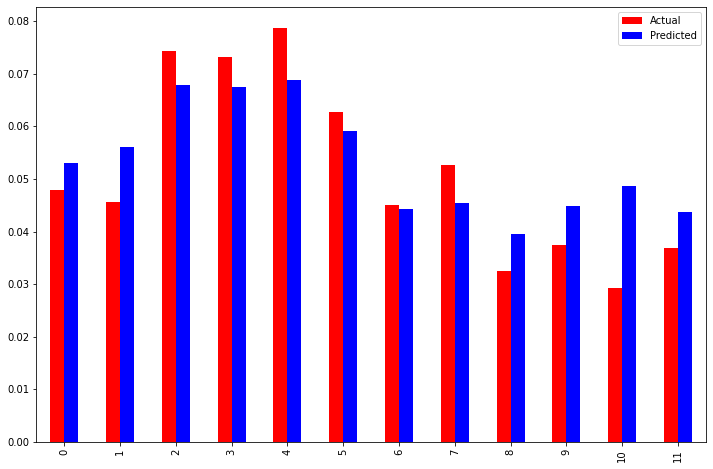

In [118]:
# show actual vs predicted median_value in a bar chart
df2.plot(kind = 'bar', color = ['red', 'blue'], figsize=(12,8))

### Conclusion

The Univariable linear regression model is good with a score of 0.73. I will however try to improve this score and accuracy of the model by increasing the number of input / independent variables.

### Multiple Linear Regression Model - Model 2

I will increase the number of input / independent variables to include lower_status. This independent variable is also strongly correlated and has a linear relationship to median_value.

The dependent variable median_value is going to be modelled as a linear function of the independent variables rooms and lower_status.

$$medianvalue = m(rooms) + m1(lower_status) + c$$

In [123]:
# import linear_model from sklearn.
import sklearn.linear_model as lm
import pandas as pd

# Create a linear regression model instance
m = lm.LinearRegression()

# perform linear regression on these input variables to predict median_value
x1 = boston_norm[['rooms','lower_status']]

# median_value is set as the dependent variable y
y1 = boston_norm['median_value']

# Ask model to fit the data - take the x array and fit it to the y value
m.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
# calculate the y intercept (c value)
m.intercept_

-0.0122575613018997

In [125]:
# calculate the eight coefficients
m.coef_

array([ 5.73914801, -0.5249589 ])

The intercept is approximately -0.01, and this is the value of the predicted response when 𝑥₁ = 𝑥₂ = 0. The increase of 𝑥₁ by 1 yields the rise of the predicted response by 5.74. Similarly, when 𝑥₂ grows by 1, the response rises by -0.52.

In [126]:
# See how good the fit is by scoring it - the best possible score is 1.0
m.score(x1, y1)

0.797404604400386

A score or coefficient of determination of 0.80 is an improvement and signifies the model is performing well. The independent variables, using a linear model, are estimating the dependent variable well.

In [127]:
# print the median_value predictions
y_pred1 = m.predict(x1)

In [128]:
# create a pandas dataframe showing actual 'median_value' and predicted 'median_value'
df3 = pd.DataFrame({'Actual': y1, 'Predicted': y_pred1})
df4 = df3.head(12)
df4

,Actual,Predicted
0,0.047940,0.057896
1,0.045709,0.055572
2,0.074272,0.071475
3,0.073114,0.072281
4,0.078707,0.070840
5,0.062725,0.062418
6,0.045008,0.042732
7,0.052630,0.037011
8,0.032490,0.020439
9,0.037439,0.038217


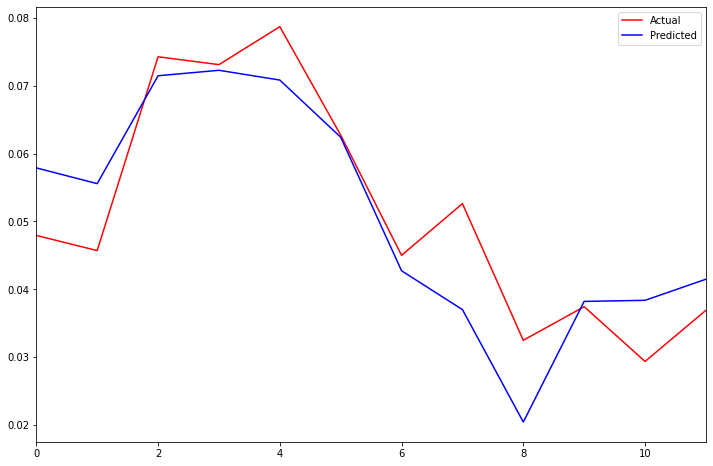

In [140]:
# show actual vs predicted median_value in a bar chart
df4.plot(kind = 'line', color = ['red', 'blue'], figsize=(12,8))

### Conclusion

The multiple linear regression model has improved and now has a coefficient of determination of 0.80. Inputting the independent variables of lower_status and rooms into the Linear Regression Model outputs a good estimate of the dependent variable median_value.

Unfortunately the Boston dataset only included two independent variables that had a linear relationship with median_value. If more of the independent variables were linear, and could be used in the Linear Regression model, the overall performance of the model would increase. 

## References

https://realpython.com/linear-regression-in-python/

https://scikit-learn.org/stable/index.html

https://pandas.pydata.org/

https://matplotlib.org/

https://seaborn.pydata.org/generated/seaborn.lmplot.html

https://www.sciencedirect.com/science/article/pii/S2452247318302164

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2992018/

### End